# Comparison of data gathered from VM (4GB) and IVORY Machine for CAT Vehicle and Sparkle Simulation

## Instrunctions to run the notebook
- You need python 3.x to run the notebook. It may run with Python 2.x but we have not tested that.
- install strym package using `pip install strym`
- You might need to restart the jupyter kernel after installing strym
- Uncomment the code in next cell to install `strym` if you have not done so.

In [1]:
!pip install strym

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pylab import rcParams
import os.path
import strym

## Get the data location

In [3]:
#homedir = os.path.expanduser("~")
#data_folder = homedir + '/CyverseData/ProjectSparkle'
data_folder = 'Single-Car-Simulation-Data'

## Sparkle is new method
## catvehicle is older, traditional method
## REU machine is slower machine
## IVORY machine is faster machine
## 1 and 2 are simulation runs

## Dataset for traditional method on slower machine, simulation 1
catvehicle_reu_machine_1 = 'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-19-14-19-51'
## Dataset for traditional method on slower machine, simulation 2
catvehicle_reu_machine_2 = 'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-23-38-24'


## Dataset for traditional method on faster machine, simulation 1
catvehicle_ivory_machine_1 =  'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-17-41-44'
## Dataset for traditional method on faster machine, simulation 2
catvehicle_ivory_machine_2 =  'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-17-03-34'

## Dataset for newer method on slower machine, simulation 1
sparkle_reu_machine_1 = 'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-23-52-28'
## Dataset for newer method on slower machine, simulation 2
sparkle_reu_machine_2 = 'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-19-07-09-11'

## Dataset for newer method on faster machine, simulation 1
sparkle_ivory_machine_1 =  'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-16-23-33'
## Dataset for newer method on faster machine, simulation 2
sparkle_ivory_machine_2 =  'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-19-08-04-53'


folders = [data_folder + '/' + catvehicle_reu_machine_1, 
           data_folder + '/' + catvehicle_reu_machine_2, 
           data_folder + '/' + catvehicle_ivory_machine_1, 
           data_folder + '/' + catvehicle_ivory_machine_2, 
           data_folder + '/' + sparkle_reu_machine_1, 
           data_folder + '/' + sparkle_reu_machine_2, 
           data_folder + '/' + sparkle_ivory_machine_1, 
           data_folder + '/' + sparkle_ivory_machine_2]

odom_file = 'magna-odom.csv'
gzstat_file = '_gzStats.txt'

data = [catvehicle_reu_machine_1,catvehicle_reu_machine_2, 
        catvehicle_ivory_machine_1,catvehicle_ivory_machine_2, 
        sparkle_reu_machine_1, sparkle_reu_machine_2,
        sparkle_ivory_machine_1, sparkle_ivory_machine_2]

gzfiles = [data_folder + '/' + f +'/'+ f+ gzstat_file   for f in data]

**Convert the data to timeseries dataframe capable of being read and analyzed by `strym` package. A timseries dataframe will have two columns with column names 'Time' and 'Message'.**

In [4]:
odom_df_array = []
X_array =  []
Y_array = []
gz_array = []
for i, folder in enumerate(folders):
    data = folder + '/' + odom_file
    odom_df = pd.read_csv(data)
    odom_df_array.append(odom_df)
    newdf1 = pd.DataFrame()
    newdf1['Time'] = odom_df['Time']
    newdf1['Message'] = odom_df['PoseX']
    X_array.append(newdf1)
    newdf2 = pd.DataFrame()
    newdf2['Time'] = odom_df['Time']
    newdf2['Message'] = odom_df['PoseY']
    Y_array.append(newdf2)
    

**Lets look how first few seconds of data looks like**

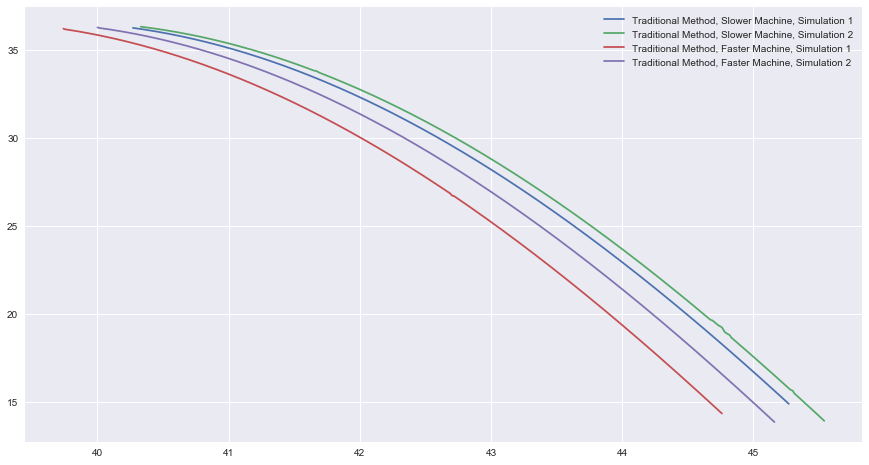

In [5]:
# We will find shift between two signals
x1 = X_array[0]['Message']
x2 = X_array[1]['Message']
rcParams['figure.figsize'] = 15, 8
plt.plot(X_array[0]['Time'].iloc[0:500],X_array[0]['Message'].iloc[0:500] )
plt.plot(X_array[1]['Time'].iloc[0:500],X_array[1]['Message'].iloc[0:500] )
plt.plot(X_array[2]['Time'].iloc[0:500],X_array[2]['Message'].iloc[0:500] )
plt.plot(X_array[3]['Time'].iloc[0:500],X_array[3]['Message'].iloc[0:500] )
plt.legend(['Traditional Method, Slower Machine, Simulation 1',
            'Traditional Method, Slower Machine, Simulation 2',
            'Traditional Method, Faster Machine, Simulation 1',
            'Traditional Method, Faster Machine, Simulation 2'])

__Clearly, we need to shift the data on time axis a little bit as logging of data for different simulation didn't begin exactly at the same time. I cannot use xcorr function to find the right shift as shift is very little (I tried it but failed). Also, I need to align data only for the beginning of the time as there will be shift observed for latter part of the data due to the repeatability problem discussed in the paper. I am manually aligning signals as I have not yet determined what's the best way to align signals automatically.__


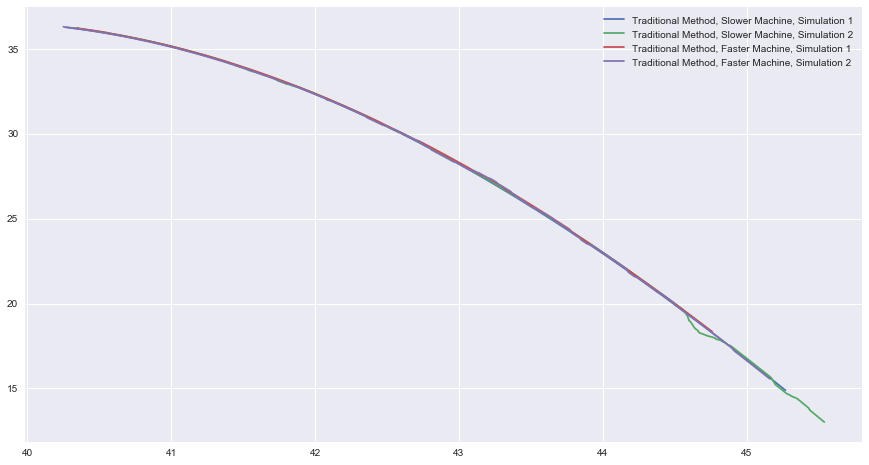

In [6]:
plt.plot(X_array[0]['Time'].iloc[0:500],X_array[0]['Message'].iloc[0:500] )
plt.plot(X_array[1]['Time'].iloc[0:500],X_array[1].shift(-12)['Message'].iloc[0:500] )
plt.plot(X_array[2]['Time'].iloc[0:500],X_array[2].shift(60)['Message'].iloc[0:500] )
plt.plot(X_array[3]['Time'].iloc[0:500],X_array[3].shift(25)['Message'].iloc[0:500] )
plt.legend(['Traditional Method, Slower Machine, Simulation 1',
           'Traditional Method, Slower Machine, Simulation 2',
           'Traditional Method, Faster Machine, Simulation 1',
           'Traditional Method, Faster Machine, Simulation 2'])

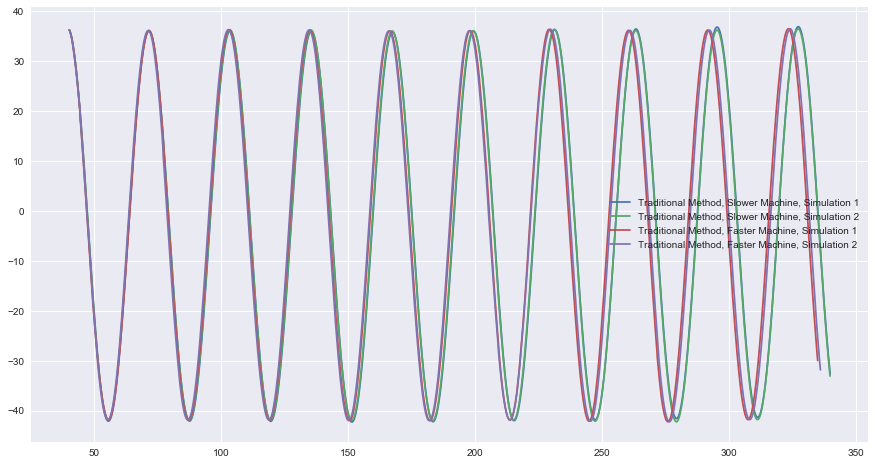

In [7]:
X_array[1]['Message'] = X_array[1].shift(-12)['Message']
X_array[1] = X_array[1].dropna()
X_array[2]['Message'] = X_array[1].shift(60)['Message']
X_array[2] = X_array[2].dropna()
X_array[3]['Message'] = X_array[1].shift(25)['Message']
X_array[3] = X_array[3].dropna()

plt.plot(X_array[0]['Time'],X_array[0]['Message'] )
plt.plot(X_array[1]['Time'],X_array[1]['Message'])
plt.plot(X_array[2]['Time'],X_array[2]['Message'] )
plt.plot(X_array[3]['Time'],X_array[3]['Message'] )
plt.legend(['Traditional Method, Slower Machine, Simulation 1',
           'Traditional Method, Slower Machine, Simulation 2',
           'Traditional Method, Faster Machine, Simulation 1',
           'Traditional Method, Faster Machine, Simulation 2'])

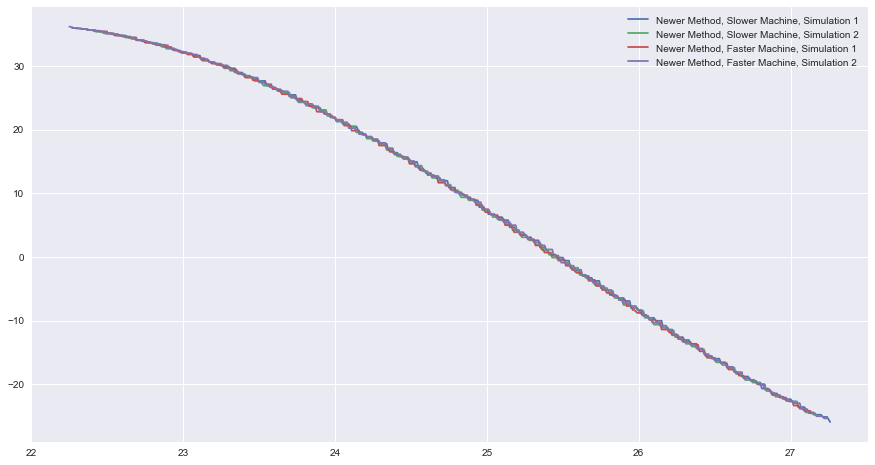

In [8]:
plt.plot(X_array[4]['Time'].iloc[0:500],X_array[4]['Message'].iloc[0:500] )
plt.plot(X_array[5]['Time'].iloc[0:500],X_array[5].shift(15)['Message'].iloc[0:500] )
plt.plot(X_array[6]['Time'].iloc[0:500],X_array[6].shift(25)['Message'].iloc[0:500] )
plt.plot(X_array[7]['Time'].iloc[0:500],X_array[7].shift(-10)['Message'].iloc[0:500] )
plt.legend(['Newer Method, Slower Machine, Simulation 1',
           'Newer Method, Slower Machine, Simulation 2',
           'Newer Method, Faster Machine, Simulation 1',
           'Newer Method, Faster Machine, Simulation 2'])

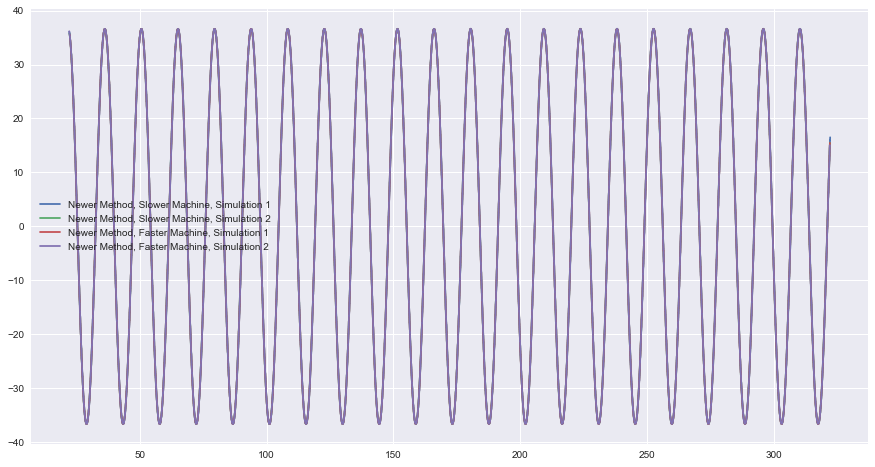

In [9]:
X_array[5]['Message'] = X_array[5].shift(15)['Message'] 
X_array[5] = X_array[5].dropna()
X_array[6]['Message'] = X_array[6].shift(25)['Message'] 
X_array[6] = X_array[6].dropna()
X_array[7]['Message'] = X_array[7].shift(-10)['Message']
X_array[7] = X_array[7].dropna()

plt.plot(X_array[4]['Time'],X_array[4]['Message'] )
plt.plot(X_array[5]['Time'],X_array[5]['Message'] )
plt.plot(X_array[6]['Time'],X_array[6]['Message'] )
plt.plot(X_array[7]['Time'],X_array[7]['Message'])
plt.legend(['Newer Method, Slower Machine, Simulation 1',
           'Newer Method, Slower Machine, Simulation 2',
           'Newer Method, Faster Machine, Simulation 1',
           'Newer Method, Faster Machine, Simulation 2'])

## We will resample the two timeseries  to calculate root mean square error.
**We need to resample the timeseries dataframe as we want equally uniform sampling with same start and end point to match vector length so as to calculated room mean square error. If vector size doesn't match then root mean square cannot be calculated.**
### Older approach

Room Mean Square Error between Two Simulations performed on REU Computer was 0.564556404615414


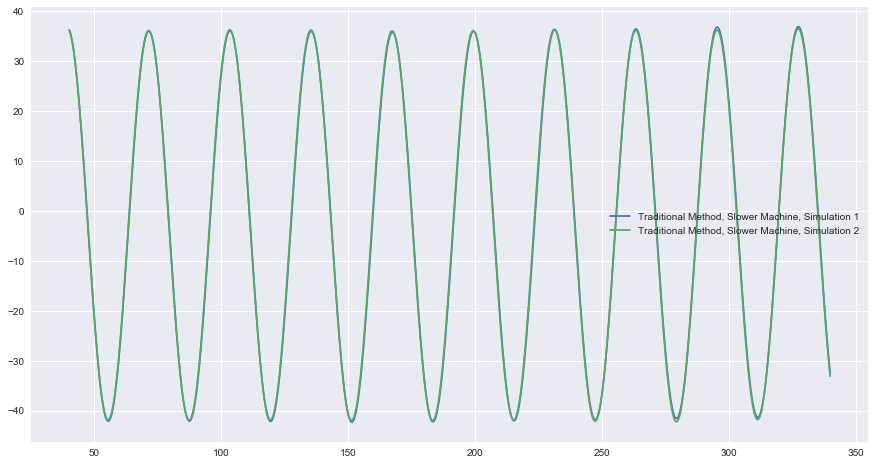

In [10]:
X0_new, X1_new = strym.ts_sync(X_array[0], X_array[1])
plt.plot(X0_new['Time'], X0_new['Message'])
plt.plot(X1_new['Time'], X1_new['Message'])
plt.legend(['Traditional Method, Slower Machine, Simulation 1',
            'Traditional Method, Slower Machine, Simulation 2'])
rms = sqrt(mean_squared_error(X0_new['Message'],X1_new['Message']))
print('Room Mean Square Error between Two Simulations performed on REU Computer was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on IVORY Computer was 2.420523070861022


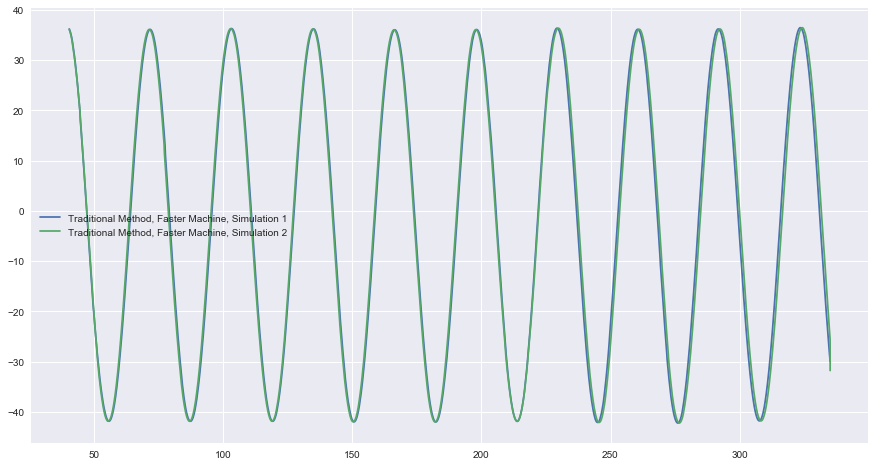

In [11]:
X2_new, X3_new = strym.ts_sync(X_array[2], X_array[3])
plt.plot(X2_new['Time'], X2_new['Message'])
plt.plot(X3_new['Time'], X3_new['Message'])
plt.legend(['Traditional Method, Faster Machine, Simulation 1', 
            'Traditional Method, Faster Machine, Simulation 2'])
rms = sqrt(mean_squared_error(X2_new['Message'],X3_new['Message']))
print('Room Mean Square Error between Two Simulations performed on IVORY Computer was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 10.273819969543268


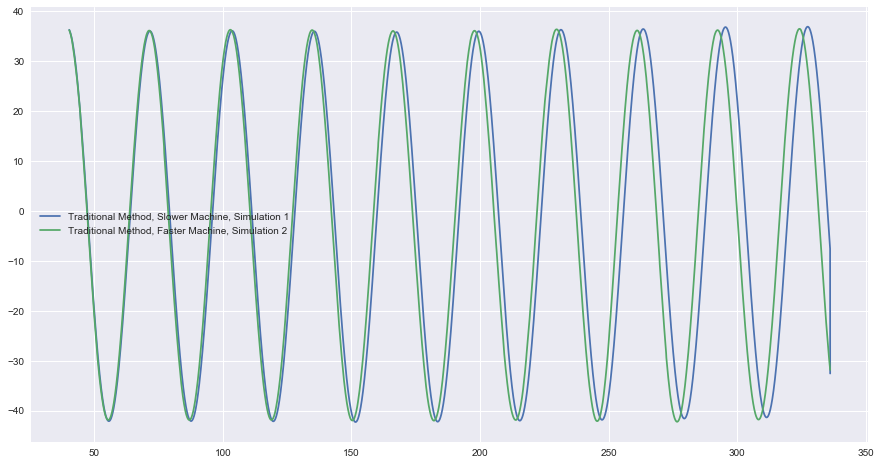

In [12]:
X0_new, X3_new = strym.ts_sync(X_array[0], X_array[3])
plt.plot(X0_new['Time'], X0_new['Message'])
plt.plot(X3_new['Time'], X3_new['Message'])
plt.legend(['Traditional Method, Slower Machine, Simulation 1', 'Traditional Method, Faster Machine, Simulation 2'])
rms = sqrt(mean_squared_error(X0_new['Message'],X3_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 11.666640170627321


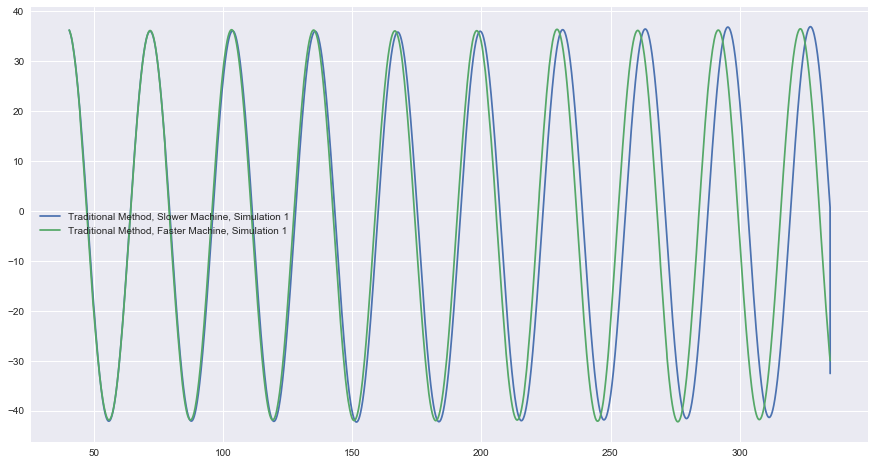

In [13]:
X0_new, X2_new = strym.ts_sync(X_array[0], X_array[2])
plt.plot(X0_new['Time'], X0_new['Message'])
plt.plot(X2_new['Time'], X2_new['Message'])
plt.legend(['Traditional Method, Slower Machine, Simulation 1', 'Traditional Method, Faster Machine, Simulation 1'])
rms = sqrt(mean_squared_error(X0_new['Message'],X2_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 11.38788638277066


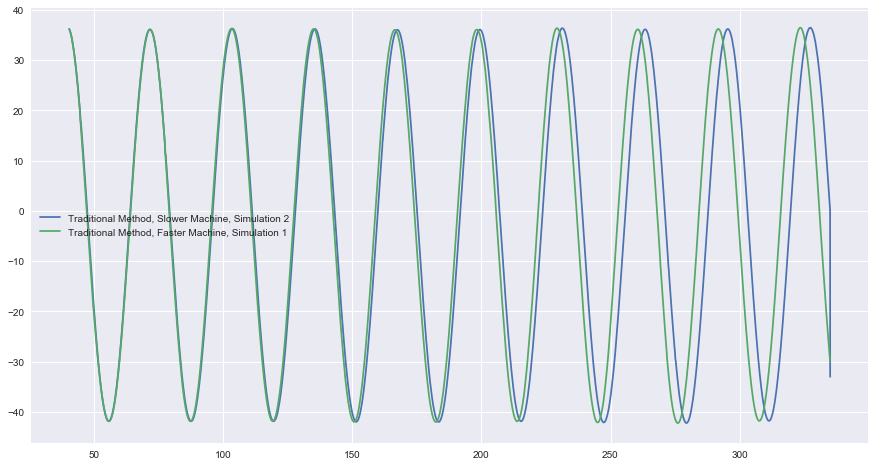

In [14]:
X1_new, X2_new = strym.ts_sync(X_array[1], X_array[2])
plt.plot(X1_new['Time'], X1_new['Message'])
plt.plot(X2_new['Time'], X2_new['Message'])
plt.legend(['Traditional Method, Slower Machine, Simulation 2', 'Traditional Method, Faster Machine, Simulation 1'])
rms = sqrt(mean_squared_error(X1_new['Message'],X2_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 9.942014594746027


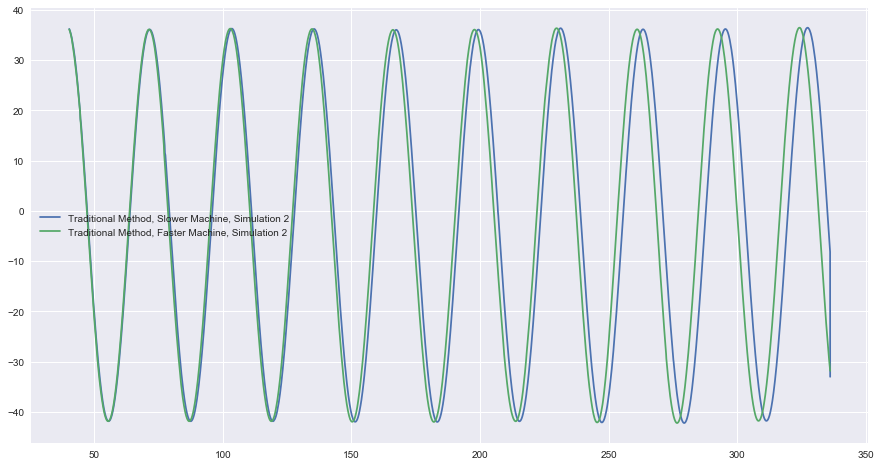

In [15]:
X1_new, X3_new = strym.ts_sync(X_array[1], X_array[3])
plt.plot(X1_new['Time'], X1_new['Message'])
plt.plot(X3_new['Time'], X3_new['Message'])
plt.legend(['Traditional Method, Slower Machine, Simulation 2', 'Traditional Method, Faster Machine, Simulation 2'])
rms = sqrt(mean_squared_error(X1_new['Message'],X3_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

### Newer approach

Room Mean Square Error between Two Simulations performed on REU Computer was 0.28156816530973927


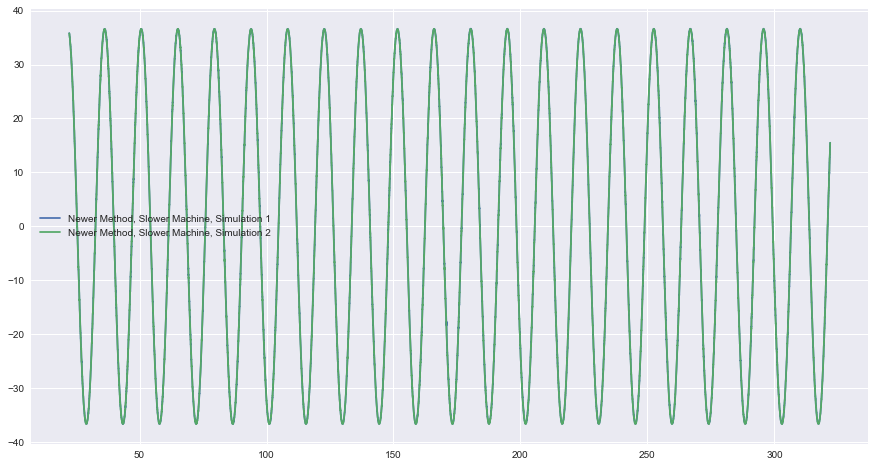

In [16]:
X4_new, X5_new = strym.ts_sync(X_array[4], X_array[5])
plt.plot(X4_new['Time'], X4_new['Message'])
plt.plot(X5_new['Time'], X5_new['Message'])
plt.legend(['Newer Method, Slower Machine, Simulation 1', 'Newer Method, Slower Machine, Simulation 2'])
rms = sqrt(mean_squared_error(X4_new['Message'],X5_new['Message']))
print('Room Mean Square Error between Two Simulations performed on REU Computer was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on IVORY computer was 0.2724948716357641


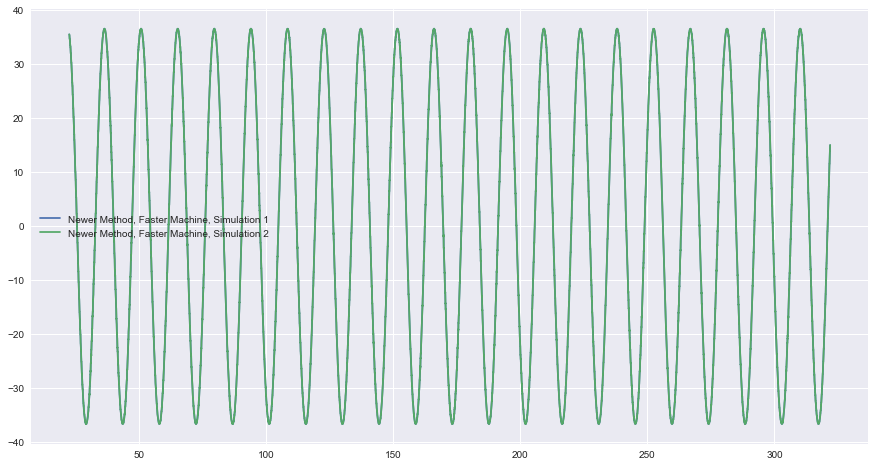

In [17]:
X6_new, X7_new = strym.ts_sync(X_array[6], X_array[7])
plt.plot(X6_new['Time'], X7_new['Message'])
plt.plot(X6_new['Time'], X7_new['Message'])
plt.legend(['Newer Method, Faster Machine, Simulation 1', 'Newer Method, Faster Machine, Simulation 2'])
rms = sqrt(mean_squared_error(X6_new['Message'],X7_new['Message']))
print('Room Mean Square Error between Two Simulations performed on IVORY computer was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.2525838443859071


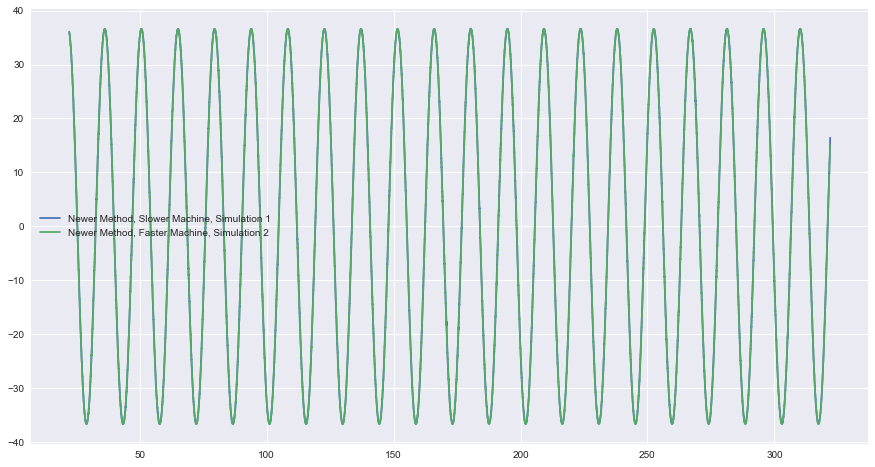

In [18]:
X4_new, X7_new = strym.ts_sync(X_array[4], X_array[7])
plt.plot(X4_new['Time'], X4_new['Message'])
plt.plot(X7_new['Time'], X7_new['Message'])
plt.legend(['Newer Method, Slower Machine, Simulation 1', 'Newer Method, Faster Machine, Simulation 2'])
rms = sqrt(mean_squared_error(X4_new['Message'],X7_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.27433666044149285


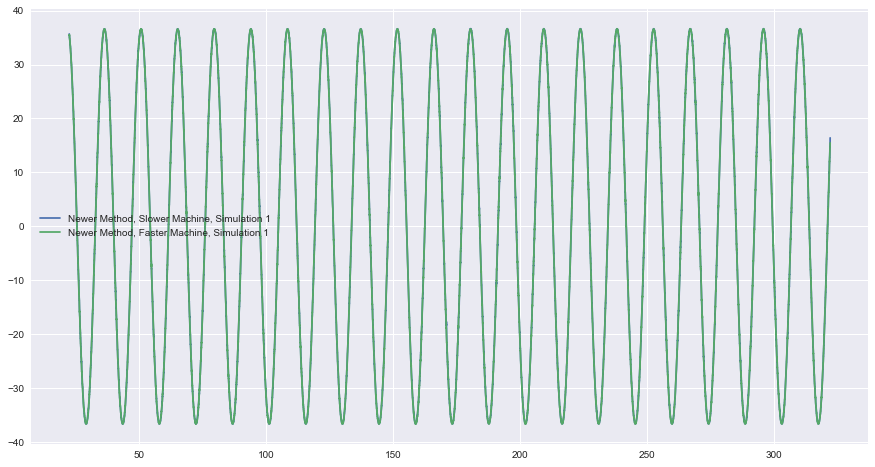

In [19]:
X4_new, X6_new = strym.ts_sync(X_array[4], X_array[6])
plt.plot(X4_new['Time'], X4_new['Message'])
plt.plot(X6_new['Time'], X6_new['Message'])
plt.legend(['Newer Method, Slower Machine, Simulation 1', 'Newer Method, Faster Machine, Simulation 1'])
rms = sqrt(mean_squared_error(X4_new['Message'],X6_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.26934350786541805


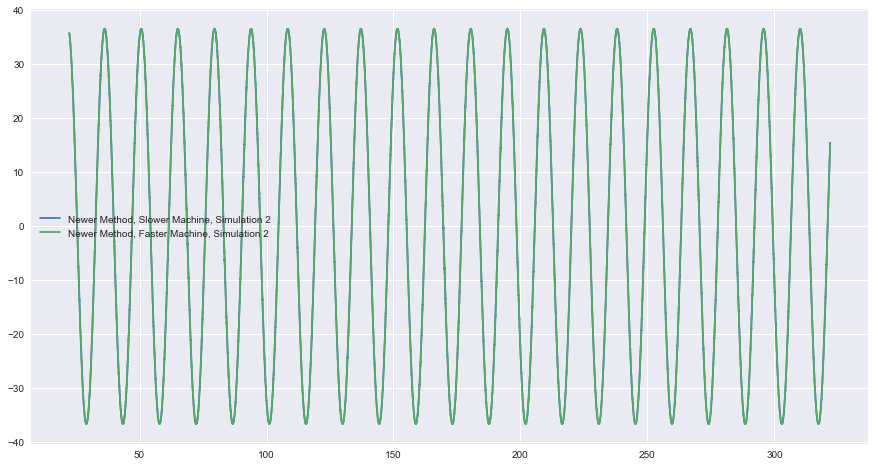

In [20]:
X5_new, X7_new = strym.ts_sync(X_array[5], X_array[7])
plt.plot(X5_new['Time'], X5_new['Message'])
plt.plot(X7_new['Time'], X7_new['Message'])
plt.legend(['Newer Method, Slower Machine, Simulation 2', 'Newer Method, Faster Machine, Simulation 2'])
rms = sqrt(mean_squared_error(X5_new['Message'],X7_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.260560015549208


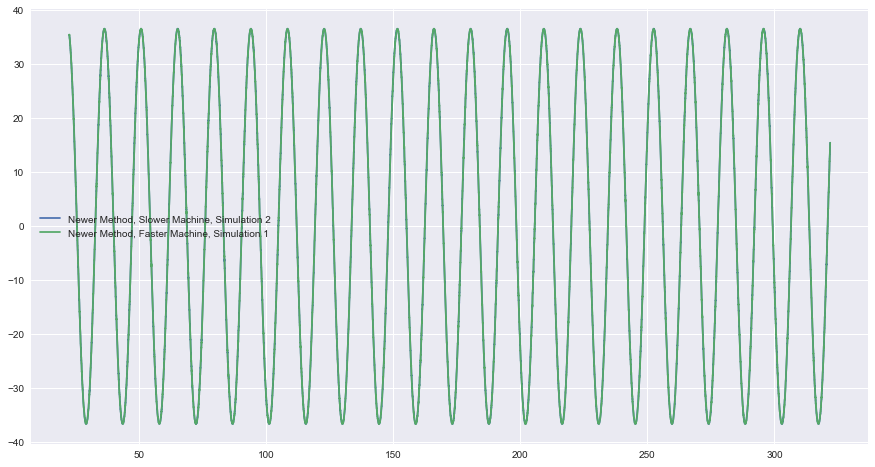

In [21]:
X5_new, X6_new = strym.ts_sync(X_array[5], X_array[6])
plt.plot(X5_new['Time'], X5_new['Message'])
plt.plot(X6_new['Time'], X6_new['Message'])
plt.legend(['Newer Method, Slower Machine, Simulation 2', 'Newer Method, Faster Machine, Simulation 1'])
rms = sqrt(mean_squared_error(X5_new['Message'],X6_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))